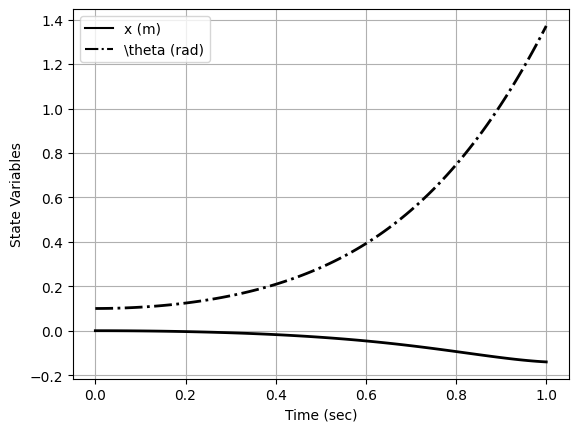

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# تابع برای شبیه‌سازی پاندول وارونه
def inverted_pendulum(t, y):
    x, theta, dx, dtheta = y
    # تعریف پارامترهای سیستم
    g = 9.81  # شتاب گرانش
    l = 1.0   # طول پاندول
    m = 1.0   # جرم پاندول
    M = 5.0   # جرم کالسکه
    b = 0.1   # ضریب دمپینگ
    I = (1/3) * m * l**2  # ممان اینرسی پاندول
    
    sin_theta = np.sin(theta)
    cos_theta = np.cos(theta)
    
    denominator = (M + m - m * cos_theta**2)
    
    ddx = (m * l * dtheta**2 * sin_theta - m * g * sin_theta * cos_theta + b * dtheta - b * dx) / denominator
    ddtheta = (g * sin_theta - cos_theta * ddx) / l
    
    return [dx, dtheta, ddx, ddtheta]

# پارامترهای شبیه‌سازی
tspan = (0, 1)
y0 = [0, 0.1, 0, 0]

# حل معادلات دیفرانسیل
sol = solve_ivp(inverted_pendulum, tspan, y0, max_step=1e-2)

# رسم نتایج شبیه‌سازی
plt.plot(sol.t, sol.y[0], 'k', label='x (m)')
plt.plot(sol.t, sol.y[1], '-.k', label='\\theta (rad)')
plt.grid()
plt.xlabel('Time (sec)')
plt.ylabel('State Variables')
plt.legend()
plt.gca().lines[0].set_linewidth(2)
plt.gca().lines[1].set_linewidth(2)
plt.show()
